<a href="https://colab.research.google.com/github/Modequick/Machine-Learning-Project/blob/main/Sempro_Modeling_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

### Load Dataset


In [ ]:
dataset_df = pd.read_csv("/content/drive/MyDrive/Skripsi/Change_Accom_Behavior_Hashed 2.csv")
dataset_df.head()

<ipython-input-103-ebb1dd7b4ed3>:1: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset_df = pd.read_csv("/content/drive/MyDrive/Skripsi/Change_Accom_Behavior_Hashed 2.csv")


,profile_id,order_id,accom_id,room_id,accom_chain_name,selling_price_idr,gbv_idr,coupon_idr,sales_date_utc7,sales_timestamp,...,next_category_1,next_category_2,next_category_3,next_latest_sentiment_analysis,next_room_type,next_bed_type,next_room_size_inmeter,count_buy_that_day,count_buy_that_month,count_buy_that_next_day
0,ET0LCvUlRKbtFLscAFkCi/WWLLw=,HCcNAiyXSymMGRQkSqzAAtFlMxc=,Uz+MOvMFoXZMCkmixPFGgpTm9lU=,L6H56k4Rou+RiVAeX2QFwrv6xwY=,NaN,524927.868189,570579.672607,0,2018-09-22,2018-09-22 09:35:41.027 UTC,...,NaN,NaN,NaN,NaN,DELUXE,ONE_DOUBLE_BED,NaN,2,7,1
1,exoQ3kUraPU4wFlzPkk5+ykBwTs=,sRDgi4iW3och3ZkFvI/7aW1P3xY=,PMJIaKNhV02UjxNiev3Ltce2kNQ=,h10O5X/RJjDGNa+4oSVmxZBhplQ=,iCwYKECg554FmWkZKOS6O7I8nXA=,853068.342720,721837.932454,0,2018-09-22,2018-09-22 03:16:16.417 UTC,...,NaN,NaN,NaN,NaN,NaN,KING,25.0,2,4,1
2,9GuIvtbdJFVdHFM/0x1p345wCwM=,xlSmSKB3tahvfYZ1DEq0Zu3nek0=,Y4UBm0bDkNkWK2JWpzmbJTlQLqc=,lqSNqRT0DKCxUC60BE3jFG5BwNQ=,NaN,192613.180745,188957.123586,0,2018-09-22,2018-09-22 01:28:14.882 UTC,...,NaN,NaN,NaN,NaN,NaN,ONE_DOUBLE_BED,18.5,2,4,1
3,QXB7Zobjy0aW6Q8SYt8DQD7fSrQ=,3d4xj1dEU8Q1tSY2APAxmcjlwFw=,TxJe7ItZLbtw1K8Aqlem51jNvaE=,P+HWuys1viVCcm4/aqWuEJ91tb0=,cCnyuGlSTM26W1cOgCNhFiEe+R8=,300377.277202,404480.886678,0,2018-09-22,2018-09-22 22:09:32.201 UTC,...,NaN,NaN,NaN,NaN,NaN,ONE_DOUBLE_BED_OR_TWO_SINGLE_B,26.0,2,4,1
4,UVEV2qykZPJQ/kfd20M2/86qKrM=,Qnf6/o5tErU5iMEiwzkWhFfiIjc=,kneU7W4rjhdyr4nKoVOP17bfaVk=,wmCmvcyYOxvDtr5DADgjj48ClEs=,HIwm7tZAAnF5sNurgy85MraVTB0=,225738.474167,231019.601478,0,2018-09-22,2018-09-22 15:08:32.967 UTC,...,NaN,NaN,NaN,NaN,DOUBLE,ONE_DOUBLE_BED,16.0,2,9,1


### Data Cleaning

In [ ]:
#missing_value
missing_value = dataset_df.isnull().sum() *100 / len(dataset_df) 

df_missing_value = pd.DataFrame( {"missing_count" : dataset_df.isnull().sum(),
             "percent_missing" : missing_value})
print(df_missing_value.sort_values(by = "missing_count",ascending=False).head(20))
print("length of columns are : ", len(dataset_df.columns))

                                missing_count  percent_missing
next_latest_sentiment_analysis          18970       100.000000
customer_type                           18970       100.000000
latest_sentiment_analysis               18969        99.994729
next_category_3                         18946        99.873484
next_category_0                         18899        99.625725
next_category_1                         18899        99.625725
next_category_2                         18899        99.625725
category_3                              18854        99.388508
category_1                              18712        98.639958
category_2                              18712        98.639958
category_0                              18711        98.634686
pid_score                               14678        77.374802
next_pid_score                          14467        76.262520
room_type                               13324        70.237217
next_room_type                          12949        68

In [ ]:
#selecing columns that are not in the above list 
df_clean = dataset_df.loc[:, ~dataset_df.columns.isin(df_missing_value.sort_values(by = "missing_count",ascending=False).head(20).index)]
df_clean = df_clean.dropna()


# droping non intuitive columns 
df_clean = df_clean.loc[:, ~df_clean.columns.isin(["count_buy_that_day",
                                                   "count_buy_that_month",
                                                   "count_buy_that_next_day",
                                                   "room_id",
                                                   "order_id",
                                                   "profile_id",
                                                   "interface",
                                                   "last_issued_date",
                                                   "next_bed_type",
                                                   "month",
                                                   "next_time_stamp",
                                                   "sales_timestamp",
                                                  #  "next_accom_id",
                                                   "next_is_use_coupon",
                                                   "next_num_rooms",
                                                   "next_gbv_idr",
                                                   "accom_id" ,
                                                   "check_in_date",
                                                   "check_out_date",
                                                   "sales_date_utc7",
                                                   "next_check_in_date",
                                                   "next_check_out_date",
                                                   "next_sales_date",
                                                   "next_is_use_coupon",
                                                   "is_use_coupon",
                                                   "next_coupon_idr",
                                                   "coupon_idr"
                                                   ])]
                                                   
#next_check_in_date,next_check_out_date,"next_check_in_date"

In [ ]:
#re-Checking missing Value

missing_value = df_clean.isnull().sum() *100 / len(dataset_df) 
df_missing_value = pd.DataFrame( {"missing_count" : df_clean.isnull().sum(),
             "percent_missing" : missing_value} )
print("length columns : ",len(df_clean.columns)  )
print(df_missing_value.sort_values(by = "missing_count",ascending=False))

length columns :  13
                        missing_count  percent_missing
selling_price_idr                   0              0.0
gbv_idr                             0              0.0
accom_region                        0              0.0
accom_star_rating                   0              0.0
num_rooms                           0              0.0
accom_type                          0              0.0
hotel_score                         0              0.0
next_accom_id                       0              0.0
next_accom_region                   0              0.0
next_accom_star_rating              0              0.0
next_accom_type                     0              0.0
next_selling_price                  0              0.0
next_hotel_score                    0              0.0


### Data Transformation

In [ ]:
# df = df_clean.iloc[:, 1:]
df = df_clean
df.head()

,selling_price_idr,gbv_idr,accom_region,accom_star_rating,num_rooms,accom_type,hotel_score,next_accom_id,next_accom_region,next_accom_star_rating,next_accom_type,next_selling_price,next_hotel_score
0,524927.868189,570579.672607,Jawa Barat,0,1,RESORT,8.742894,pmSgKDam2G81GGvziqaLZ1uu8uI=,Jawa Barat,3,HOTEL,619873.919739,7.395015
1,853068.342720,721837.932454,Jawa Tengah,3,2,HOTEL,8.655503,5GeTZvyDUlmdvqPtk82Cgja7UTM=,Jawa Tengah,4,HOTEL,575869.264779,8.904430
2,192613.180745,188957.123586,Jakarta,2,1,HOTEL,7.758292,FI1+e7bUFpzOX1jBaUNnyRpENYM=,Jakarta,2,HOTEL,217938.428145,7.909794
3,300377.277202,404480.886678,Lampung Province,2,1,HOTEL,8.686632,eGbvfr1SoxiZI4umM3lKK/YRGqQ=,Lampung Province,3,HOTEL,253241.759032,8.541579
4,225738.474167,231019.601478,Aceh,1,1,HOMESTAY,8.257246,TQAbN/D9xL2fSELvW0UnubNuuy4=,Aceh,1,HOTEL,302766.724742,7.046263


In [ ]:
#dropping quantitative columns 
df = df.loc[:, ~df.columns.isin(["next_accom_region","next_accom_type"])]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17700 entries, 0 to 18969
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   selling_price_idr       17700 non-null  float64
 1   gbv_idr                 17700 non-null  float64
 2   accom_region            17700 non-null  object 
 3   accom_star_rating       17700 non-null  int64  
 4   num_rooms               17700 non-null  int64  
 5   accom_type              17700 non-null  object 
 6   hotel_score             17700 non-null  float64
 7   next_accom_id           17700 non-null  object 
 8   next_accom_star_rating  17700 non-null  int64  
 9   next_selling_price      17700 non-null  float64
 10  next_hotel_score        17700 non-null  float64
dtypes: float64(5), int64(3), object(3)
memory usage: 1.6+ MB


<Axes: >

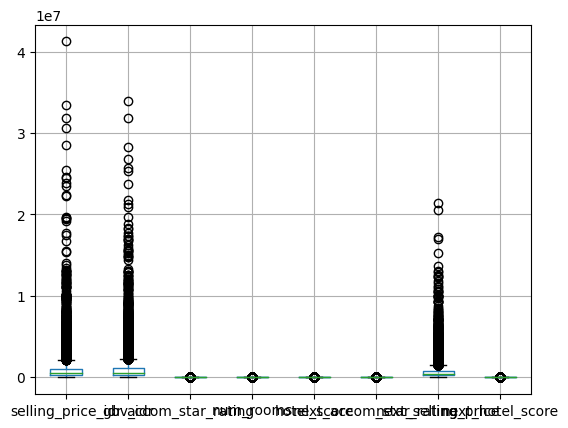

In [ ]:
#Seeing boxplot to see outliers in the data
Quantitative_column = ['selling_price_idr',
 'gbv_idr',
 #'accom_region',
 'accom_star_rating',
 'num_rooms',
 #'accom_type',
 'hotel_score',
 'next_accom_star_rating',
 'next_selling_price',
 'next_hotel_score']

df.boxplot(column = Quantitative_column)

In [ ]:
#Dropping outliers based IQR for  quantitative columns
for i in Quantitative_column : 
  Q1 = df[i].quantile(0.25)
  Q3 = df[i].quantile(0.75)
  IQR = Q3 - Q1 
  filter = (df[i] >= Q1 - 1.5 * IQR) & (df[i] <= Q3 + 1.5 *IQR)
  df = df.loc[filter]

In [ ]:
# accom_region_dummies  = pd.get_dummies(df["accom_region"],drop_first = True,prefix = "accom_region")
# accom_type = pd.get_dummies(df["accom_type"],drop_first = True,prefix = "accom_type")

df = df.drop(['accom_region',"accom_type"],axis = 1)

In [ ]:
df["selling_price_idr"] = df["selling_price_idr"].round(0)
df["gbv_idr"] = df["gbv_idr"].round(0)
df["hotel_score"] = df["hotel_score"].round(1)


In [ ]:
# df = df.join(accom_region_dummies)
# df = df.join(accom_type)
df.head()

,selling_price_idr,gbv_idr,accom_star_rating,num_rooms,hotel_score,next_accom_id,next_accom_star_rating,next_selling_price,next_hotel_score
2,192613.0,188957.0,2,1,7.8,FI1+e7bUFpzOX1jBaUNnyRpENYM=,2,217938.428145,7.909794
3,300377.0,404481.0,2,1,8.7,eGbvfr1SoxiZI4umM3lKK/YRGqQ=,3,253241.759032,8.541579
10,282218.0,286995.0,1,1,8.8,e+CV35U5KzPMg3m2nPQLCYpAEWY=,2,407069.886269,8.635668
11,839504.0,924993.0,4,1,8.8,Ad87IECKaTaW0PSmigdwic27/TU=,2,510035.736417,8.515937
12,466566.0,406465.0,4,1,8.7,Qfh1FjHkGE+ABK2VEWns/8RgAog=,2,499417.728278,8.777600


In [ ]:
df_accom_id = df[["next_accom_id"]]
df = df.loc[:, ~df.columns.isin(["next_accom_id"])]

In [ ]:
#VIF 
y = ["next_accom_star_rating","next_selling_price","next_hotel_score"]
vif_df = pd.DataFrame()
vif_df["Feature"] = df[y].columns
vif_df ["VIF"]= [variance_inflation_factor(df.values, i) for i in range(len(df[y].columns))]
vif_df

,Feature,VIF
0,next_accom_star_rating,5.242062
1,next_selling_price,5.329614
2,next_hotel_score,1.343454


In [ ]:
#selecting columns that <= 10
# df = df[vif_df["Feature"][vif_df["VIF"] <=10 ].values.tolist()]

In [ ]:
#Data Transformation : Scaling 

y = ["next_accom_star_rating","next_selling_price","next_hotel_score"]
X = df[["selling_price_idr","gbv_idr","accom_star_rating","hotel_score"]]

def build_min_max_scaler(df) :
  scaled_columns = pd.DataFrame()
  for i in df[y]:
      min = df[i].min()
      df[i] = df[i]-min
      max = df[i].max()
      scaled_columns[i] = pd.DataFrame( round(df[i]/max ,5) )

      print(i, max)
      print(i, min)
      print("")
  return scaled_columns

y = build_min_max_scaler(df)    
y.head()


next_accom_star_rating 3
next_accom_star_rating 1

next_selling_price 1252849.5868832094
next_selling_price 39745.27219706308

next_hotel_score 1.6154914243601768
next_hotel_score 7.642596810933939



,next_accom_star_rating,next_selling_price,next_hotel_score
2,0.33333,0.14223,0.16540
3,0.66667,0.17041,0.55648
10,0.33333,0.29319,0.61472
11,0.33333,0.37538,0.54060
12,0.33333,0.36690,0.70257


In [ ]:
complete_df = pd.concat([y, df_accom_id], axis=1)

In [ ]:
complete_df

,next_accom_star_rating,next_selling_price,next_hotel_score,next_accom_id
2,0.33333,0.14223,0.16540,FI1+e7bUFpzOX1jBaUNnyRpENYM=
3,0.66667,0.17041,0.55648,eGbvfr1SoxiZI4umM3lKK/YRGqQ=
10,0.33333,0.29319,0.61472,e+CV35U5KzPMg3m2nPQLCYpAEWY=
11,0.33333,0.37538,0.54060,Ad87IECKaTaW0PSmigdwic27/TU=
12,0.33333,0.36690,0.70257,Qfh1FjHkGE+ABK2VEWns/8RgAog=
...,...,...,...,...
18959,0.66667,0.31161,0.76839,KdxCZ6ekvvq4o9oqHCL8duhwBCY=
18964,0.33333,0.28321,0.61274,ogBwFVEGkS3syKlDSeRyRygVMfI=
18965,0.66667,0.22897,0.47574,qdnFPc1h/femzNuyiOERDAT3eNw=
18966,1.00000,0.66327,0.60633,dU8JmZhUw59kPNnNKrC1OtMIUFs=


In [ ]:
agg_df = complete_df.groupby("next_accom_id").agg({"mean"})

In [ ]:
agg_df

,next_accom_star_rating,next_selling_price,next_hotel_score
,mean,mean,mean
next_accom_id,,,
++J+peSDoddHDas+/yAkV6T981Y=,0.33333,0.350400,0.48135
+0W0xS/Q91Hdkqf8BR77eU6O5tQ=,0.33333,0.317710,0.57547
+0ZgJX8VgmSt3ZgSynwUYsf5Ud4=,0.33333,0.137770,0.23197
+1hh8gvvb5G6A3LfkEAj+QmwLqo=,1.00000,0.566020,0.66778
+1jXw4/BXEWovr21eqRDssMOgtA=,0.00000,0.055315,0.34539
...,...,...,...
zy7LGvFw6J0mtHuE+2pju4urglk=,0.00000,0.134880,0.42108
zyUOsyFDQBDdewEXgR9LxpFq+9E=,0.33333,0.468680,0.21336


### K-Means

In [ ]:
# my_list = df.columns.tolist()
# exclude_words = ['next']
# independent_columns = [item for item in my_list if not any(word in item for word in exclude_words)]
# print(independent_columns)

In [ ]:
#Kmeans 
results = []
for i in range (1, 15):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(agg_df)
    results.append(kmeans.inertia_)   

def index_for_kmeans(results) : 
  b=[]
  a = 0 
  for i in results:
    a = a+ 1  
    b.append(a)
  return b     

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

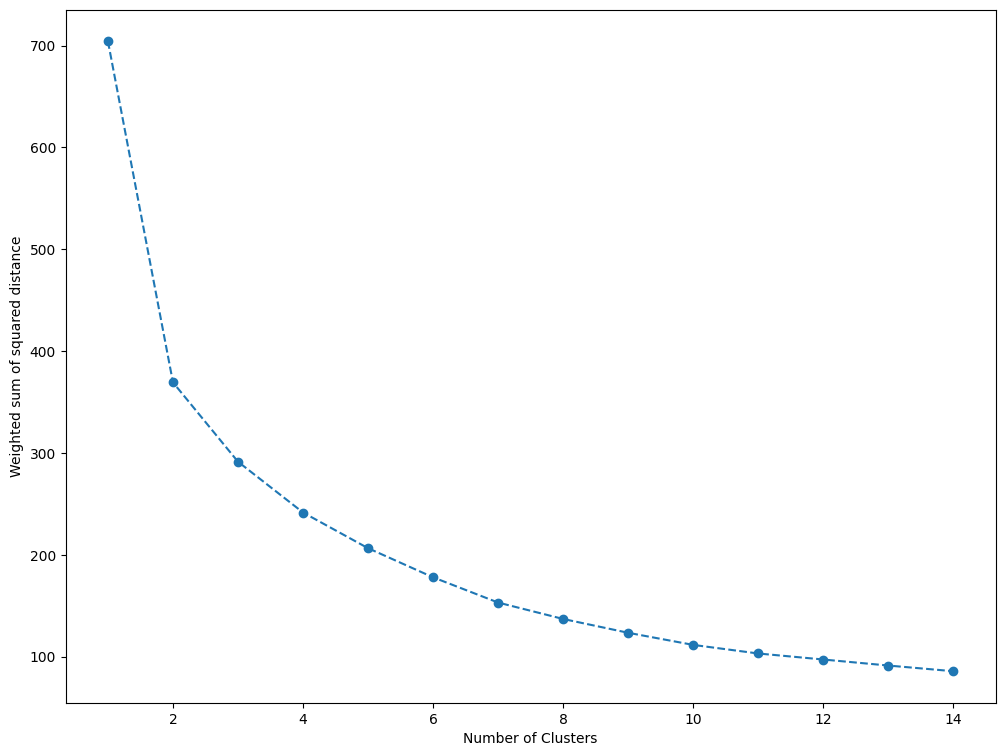

In [ ]:
plt.figure(figsize=(12, 9))
plt.plot(index_for_kmeans(results), results, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Weighted sum of squared distance')
plt.show()

In [ ]:
wcss_df = pd.DataFrame()
wcss_df["WCSS"] = results
wcss_df["WCSS"] = round (wcss_df["WCSS"],2)
wcss_df["lag"] = wcss_df["WCSS"].shift(+1)
wcss_df["change_in_percentage"] = round ((wcss_df["lag"] - wcss_df["WCSS"]) / wcss_df["lag"] * 100,2).astype('str') + "%"
wcss_df["difference_change_in_percentage"] = round ((wcss_df["lag"] - wcss_df["WCSS"]) / wcss_df["lag"] * 100,2).shift(+1) -  round ((wcss_df["lag"] - wcss_df["WCSS"]) / wcss_df["lag"] * 100,2)
# wcss_df[["WCSS","change_in_percentage","difference_change_in_percentage"]]

wcss_df["WCSS_Change"] = wcss_df["lag"] - wcss_df["WCSS"]
wcss_df["difference_WCSS_Change"] = wcss_df["WCSS_Change"].shift(+1)  -  wcss_df["WCSS_Change"]
wcss_df["Number_of_Cluster"] = [i+1 for i in range (14)]

wcss_df[["Number_of_Cluster","WCSS","WCSS_Change","difference_WCSS_Change"]]




,Number_of_Cluster,WCSS,WCSS_Change,difference_WCSS_Change
0,1,704.27,NaN,NaN
1,2,369.25,335.02,NaN
2,3,291.35,77.90,257.12
3,4,241.48,49.87,28.03
4,5,206.43,35.05,14.82
5,6,177.83,28.60,6.45
6,7,153.05,24.78,3.82
7,8,136.93,16.12,8.66
8,9,123.37,13.56,2.56
9,10,111.47,11.90,1.66


In [ ]:
#Using Elbow method, we found the best model for this is 4 
kmeans = KMeans(n_clusters = 4 , init = 'k-means++',random_state = 42 )
kmeans.fit(agg_df)
clusters = kmeans.labels_
agg_df['clusters'] = clusters

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
agg_df

,next_accom_star_rating,next_selling_price,next_hotel_score,clusters
,mean,mean,mean,
next_accom_id,,,,
++J+peSDoddHDas+/yAkV6T981Y=,0.33333,0.350400,0.48135,1
+0W0xS/Q91Hdkqf8BR77eU6O5tQ=,0.33333,0.317710,0.57547,1
+0ZgJX8VgmSt3ZgSynwUYsf5Ud4=,0.33333,0.137770,0.23197,3
+1hh8gvvb5G6A3LfkEAj+QmwLqo=,1.00000,0.566020,0.66778,0
+1jXw4/BXEWovr21eqRDssMOgtA=,0.00000,0.055315,0.34539,3
...,...,...,...,...
zy7LGvFw6J0mtHuE+2pju4urglk=,0.00000,0.134880,0.42108,3
zyUOsyFDQBDdewEXgR9LxpFq+9E=,0.33333,0.468680,0.21336,3


In [ ]:
cluster_result = agg_df.reset_index()[['next_accom_id', 'clusters']]

In [ ]:
cluster_result

,next_accom_id,clusters
,,
0,++J+peSDoddHDas+/yAkV6T981Y=,1
1,+0W0xS/Q91Hdkqf8BR77eU6O5tQ=,1
2,+0ZgJX8VgmSt3ZgSynwUYsf5Ud4=,3
3,+1hh8gvvb5G6A3LfkEAj+QmwLqo=,0
4,+1jXw4/BXEWovr21eqRDssMOgtA=,3
...,...,...
4071,zy7LGvFw6J0mtHuE+2pju4urglk=,3
4072,zyUOsyFDQBDdewEXgR9LxpFq+9E=,3
4073,zzHVb7xSpI2X2jjn8/s9f6gSSDg=,3


In [ ]:
X_with_accom_id = pd.concat([X, df_accom_id], axis=1)

In [ ]:
X_with_accom_id

,selling_price_idr,gbv_idr,accom_star_rating,hotel_score,next_accom_id
2,192613.0,188957.0,2,7.8,FI1+e7bUFpzOX1jBaUNnyRpENYM=
3,300377.0,404481.0,2,8.7,eGbvfr1SoxiZI4umM3lKK/YRGqQ=
10,282218.0,286995.0,1,8.8,e+CV35U5KzPMg3m2nPQLCYpAEWY=
11,839504.0,924993.0,4,8.8,Ad87IECKaTaW0PSmigdwic27/TU=
12,466566.0,406465.0,4,8.7,Qfh1FjHkGE+ABK2VEWns/8RgAog=
...,...,...,...,...,...
18959,265062.0,313261.0,2,8.3,KdxCZ6ekvvq4o9oqHCL8duhwBCY=
18964,357839.0,278846.0,3,8.3,ogBwFVEGkS3syKlDSeRyRygVMfI=
18965,252747.0,222786.0,2,7.5,qdnFPc1h/femzNuyiOERDAT3eNw=
18966,1074395.0,1071035.0,4,8.8,dU8JmZhUw59kPNnNKrC1OtMIUFs=


In [ ]:
key_list = list(X_with_accom_id['next_accom_id'])
dict_lookup = dict(zip(cluster_result['next_accom_id'], cluster_result['clusters']))

In [ ]:
X_with_accom_id['next_accom_id'] = [dict_lookup[item] for item in key_list]

In [ ]:
X_with_accom_id['next_accom_id'].value_counts()

2    3665
0    2299
1    2172
3    1281
Name: next_accom_id, dtype: int64

In [ ]:
df = X_with_accom_id.rename(columns={"next_accom_id": "dependent"})

In [ ]:
y_with_accom_id = pd.concat([y, df_accom_id], axis=1)

In [ ]:
y_with_accom_id

,next_accom_star_rating,next_selling_price,next_hotel_score,next_accom_id
2,0.33333,0.14223,0.16540,FI1+e7bUFpzOX1jBaUNnyRpENYM=
3,0.66667,0.17041,0.55648,eGbvfr1SoxiZI4umM3lKK/YRGqQ=
10,0.33333,0.29319,0.61472,e+CV35U5KzPMg3m2nPQLCYpAEWY=
11,0.33333,0.37538,0.54060,Ad87IECKaTaW0PSmigdwic27/TU=
12,0.33333,0.36690,0.70257,Qfh1FjHkGE+ABK2VEWns/8RgAog=
...,...,...,...,...
18959,0.66667,0.31161,0.76839,KdxCZ6ekvvq4o9oqHCL8duhwBCY=
18964,0.33333,0.28321,0.61274,ogBwFVEGkS3syKlDSeRyRygVMfI=
18965,0.66667,0.22897,0.47574,qdnFPc1h/femzNuyiOERDAT3eNw=
18966,1.00000,0.66327,0.60633,dU8JmZhUw59kPNnNKrC1OtMIUFs=


In [ ]:
key_list = list(y_with_accom_id['next_accom_id'])
dict_lookup = dict(zip(cluster_result['next_accom_id'], cluster_result['clusters']))

In [ ]:
y_with_accom_id['next_accom_id'] = [dict_lookup[item] for item in key_list]

In [ ]:
y_with_accom_id['next_accom_id'].value_counts()

2    3665
0    2299
1    2172
3    1281
Name: next_accom_id, dtype: int64

In [ ]:
y_with_accom_id

,next_accom_star_rating,next_selling_price,next_hotel_score,next_accom_id
2,0.33333,0.14223,0.16540,3
3,0.66667,0.17041,0.55648,2
10,0.33333,0.29319,0.61472,1
11,0.33333,0.37538,0.54060,1
12,0.33333,0.36690,0.70257,1
...,...,...,...,...
18959,0.66667,0.31161,0.76839,2
18964,0.33333,0.28321,0.61274,1
18965,0.66667,0.22897,0.47574,2
18966,1.00000,0.66327,0.60633,0


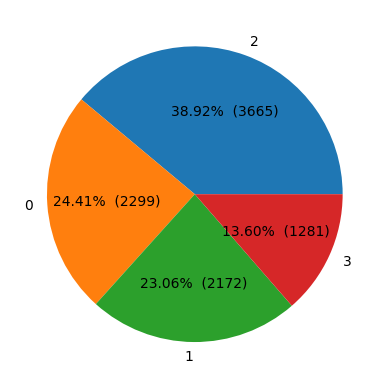

In [ ]:
#Descriptive for Cluster 
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

plt.pie(y_with_accom_id["next_accom_id"].value_counts(), labels=y_with_accom_id["next_accom_id"].value_counts().index , autopct=make_autopct(y_with_accom_id["next_accom_id"].value_counts().values.tolist()))

plt.show()

In [ ]:
y_with_accom_id

,next_accom_star_rating,next_selling_price,next_hotel_score,next_accom_id
2,0.33333,0.14223,0.16540,3
3,0.66667,0.17041,0.55648,2
10,0.33333,0.29319,0.61472,1
11,0.33333,0.37538,0.54060,1
12,0.33333,0.36690,0.70257,1
...,...,...,...,...
18959,0.66667,0.31161,0.76839,2
18964,0.33333,0.28321,0.61274,1
18965,0.66667,0.22897,0.47574,2
18966,1.00000,0.66327,0.60633,0


In [ ]:
y_with_accom_id["next_accom_star_rating"] = round (y_with_accom_id["next_accom_star_rating"] * 3 + 1)
y_with_accom_id["next_selling_price"] = round (y_with_accom_id["next_selling_price"] * 1252849.5868832094 + 39745.27219706308 ) 
y_with_accom_id["next_hotel_score"] = round (y_with_accom_id["next_hotel_score"] * 1.6154914243601768 + 7.642596810933939 , 2) 

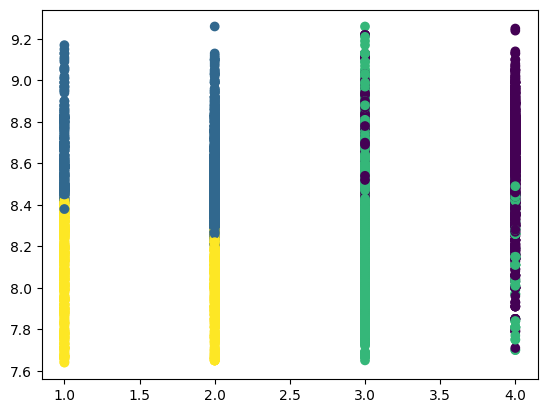

In [ ]:
plt.scatter(y_with_accom_id["next_accom_star_rating"], y_with_accom_id["next_hotel_score"], c = y_with_accom_id["next_accom_id"]) 

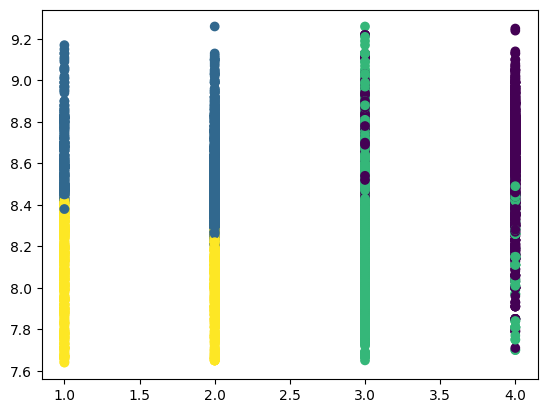

In [ ]:
plt.scatter(y_with_accom_id["next_accom_star_rating"], y_with_accom_id["next_hotel_score"], c = y_with_accom_id["next_accom_id"]) 

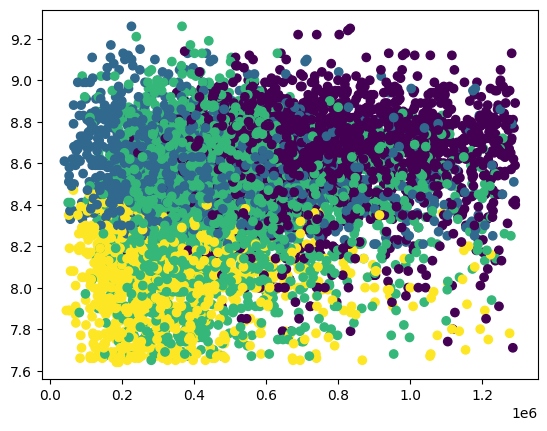

In [ ]:
plt.scatter(y_with_accom_id["next_selling_price"],y_with_accom_id["next_hotel_score"], c = y_with_accom_id["next_accom_id"]) 

In [ ]:
y_with_accom_id["Cluster"]  = y_with_accom_id["next_accom_id"]

In [ ]:
pd.DataFrame (y_with_accom_id.groupby("Cluster",as_index = False)["next_accom_star_rating"].value_counts() ) 

,Cluster,next_accom_star_rating,count
0,0,4.0,1787
1,0,3.0,511
2,0,2.0,1
3,1,2.0,1834
4,1,1.0,338
5,2,3.0,3531
6,2,4.0,134
7,3,2.0,702
8,3,1.0,579


In [ ]:
pd.DataFrame ( round (y_with_accom_id.groupby("Cluster",as_index = False)["next_selling_price"].mean()))

,Cluster,next_selling_price
0,0,744065.0
1,1,404053.0
2,2,462330.0
3,3,328840.0


In [ ]:
bin_labels_5 = ['7-8', '8-9', '9-10']
y_with_accom_id ["binning_next_hotel_score"]= pd.cut(y_with_accom_id['next_hotel_score'],
                              bins=[7,8,9,10],
                              labels=bin_labels_5)

pd.DataFrame (y_with_accom_id.groupby("Cluster" ,as_index = "False")["binning_next_hotel_score"].value_counts())

binning_next_hotel_score
Cluster                               
0       8-9                       2218
        9-10                        43
        7-8                         38
1       8-9                       2138
        9-10                        34
        7-8                          0
2       8-9                       3397
        7-8                        244
        9-10                        24
3       8-9                        811
        7-8                        470
        9-10                         0

### Train Test Split

In [ ]:
df.head()

,selling_price_idr,gbv_idr,accom_star_rating,hotel_score,dependent
2,192613.0,188957.0,2,7.8,3
3,300377.0,404481.0,2,8.7,2
10,282218.0,286995.0,1,8.8,1
11,839504.0,924993.0,4,8.8,1
12,466566.0,406465.0,4,8.7,1


In [ ]:
X = df.loc[:, df.columns != "dependent"]

In [ ]:
X.head()

,selling_price_idr,gbv_idr,accom_star_rating,hotel_score
2,192613.0,188957.0,2,7.8
3,300377.0,404481.0,2,8.7
10,282218.0,286995.0,1,8.8
11,839504.0,924993.0,4,8.8
12,466566.0,406465.0,4,8.7


In [ ]:
def build_min_max_scaler(df) :
  scaled_columns = pd.DataFrame()
  for i in df[X.columns]:
      min = df[i].min()
      df[i] = df[i]-min
      max = df[i].max()
      scaled_columns[i] = pd.DataFrame( round(df[i]/max ,5) )
  return scaled_columns

X = build_min_max_scaler(df)

In [ ]:
X.head()

,selling_price_idr,gbv_idr,accom_star_rating,hotel_score
2,0.07674,0.10337,0.33333,0.20
3,0.12715,0.22127,0.33333,0.65
10,0.11866,0.15700,0.00000,0.70
11,0.37938,0.50600,1.00000,0.70
12,0.20490,0.22235,1.00000,0.65


In [ ]:
y = df['dependent']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Random Forest

In [ ]:
#Random Forest 

rfc = RandomForestClassifier(random_state = 42 )

#fit to model 
rfc.fit(X_train,y_train)

y_pred = rfc.predict(X_train)

accuracy_score(y_train, y_pred)

1.0

In [ ]:
y_pred = rfc.predict(X_test)
accuracy_score(y_test, y_pred)

0.31687898089171973

In [ ]:
cross_val_score(rfc, X_train, y_train, cv=5).mean()

0.3424935956241391

### XGBoost

In [ ]:
xgb = GradientBoostingClassifier(random_state=42)

#fit to model 
xgb.fit(X_train ,y_train)

y_pred = xgb.predict(X_train)

accuracy_score(y_train, y_pred)

0.47218903491304925

In [ ]:
y_pred = xgb.predict(X_test)

accuracy_score(y_test, y_pred)

0.38057324840764334

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cross_val_score(xgb, X_train, y_train, cv=5).mean()

0.38125542510339094

### Grid Search

In [ ]:
n_estimators = [10, 100, 500]
max_depth = [None, 3, 5, 7]
param_grid = dict(n_estimators=n_estimators, max_depth=max_depth)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid = GridSearchCV(estimator=rfc, 
                    param_grid=param_grid,
                    cv=2,
                    verbose=2,
                    n_jobs=-1)

grid_result = grid.fit(X_train, y_train)

Fitting 2 folds for each of 12 candidates, totalling 24 fits


In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.391477 using {'max_depth': 3, 'n_estimators': 500}
0.325103 (0.002565) with: {'max_depth': None, 'n_estimators': 10}
0.349529 (0.002834) with: {'max_depth': None, 'n_estimators': 100}
0.348998 (0.002834) with: {'max_depth': None, 'n_estimators': 500}
0.390814 (0.002441) with: {'max_depth': 3, 'n_estimators': 10}
0.388956 (0.002707) with: {'max_depth': 3, 'n_estimators': 100}
0.391477 (0.000081) with: {'max_depth': 3, 'n_estimators': 500}
0.388823 (0.003105) with: {'max_depth': 5, 'n_estimators': 10}
0.388956 (0.003238) with: {'max_depth': 5, 'n_estimators': 100}
0.389487 (0.004034) with: {'max_depth': 5, 'n_estimators': 500}
0.376876 (0.009741) with: {'max_depth': 7, 'n_estimators': 10}
0.386301 (0.007220) with: {'max_depth': 7, 'n_estimators': 100}
0.385638 (0.007618) with: {'max_depth': 7, 'n_estimators': 500}


In [ ]:
best_model_rfc = grid_result.best_estimator_
cross_val_score(best_model_rfc, X_train, y_train, cv=5).mean()

0.39081321253363016

In [ ]:
grid = GridSearchCV(estimator=xgb, 
                    param_grid=param_grid,
                    cv=2,
                    verbose=2,
                    n_jobs=-1)

grid_result = grid.fit(X_train, y_train)

Fitting 2 folds for each of 12 candidates, totalling 24 fits


In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.389619 using {'max_depth': 3, 'n_estimators': 10}
0.330148 (0.003363) with: {'max_depth': None, 'n_estimators': 10}
0.326431 (0.004955) with: {'max_depth': None, 'n_estimators': 100}
0.323245 (0.005751) with: {'max_depth': None, 'n_estimators': 500}
0.389619 (0.001512) with: {'max_depth': 3, 'n_estimators': 10}
0.380593 (0.005759) with: {'max_depth': 3, 'n_estimators': 100}
0.349794 (0.004600) with: {'max_depth': 3, 'n_estimators': 500}
0.388690 (0.001645) with: {'max_depth': 5, 'n_estimators': 10}
0.369309 (0.002704) with: {'max_depth': 5, 'n_estimators': 100}
0.350326 (0.005755) with: {'max_depth': 5, 'n_estimators': 500}
0.382982 (0.004697) with: {'max_depth': 7, 'n_estimators': 10}
0.361477 (0.003632) with: {'max_depth': 7, 'n_estimators': 100}
0.341033 (0.001149) with: {'max_depth': 7, 'n_estimators': 500}


In [ ]:
best_model_xgb = grid_result.best_estimator_
cross_val_score(best_model_xgb, X_train, y_train, cv=5).mean()

0.38802595413523966

In [ ]:
xgb_aft_grid_search = GradientBoostingClassifier(random_state=42, max_depth=3, n_estimators=10)

In [ ]:
xgb_aft_grid_search.fit(X_train ,y_train)

y_pred = xgb_aft_grid_search.predict(X_train)

accuracy_score(y_train, y_pred)

0.3954599761051374

In [ ]:
y_pred = xgb_aft_grid_search.predict(X_test)

accuracy_score(y_test, y_pred)

0.3880042462845011

In [ ]:
rfc_aft_grid_search = RandomForestClassifier(random_state=42, max_depth=5, n_estimators=100)

In [ ]:
rfc_aft_grid_search.fit(X_train ,y_train)

y_pred = rfc_aft_grid_search.predict(X_train)

accuracy_score(y_train, y_pred)

0.41630160626576396

In [ ]:
y_pred = rfc_aft_grid_search.predict(X_test)

accuracy_score(y_test, y_pred)

0.39065817409766457

In [ ]:
rfc_aft_grid_search.feature_importances_

array([0.32001506, 0.31150018, 0.27482994, 0.09365482])

Text(0.5, 0, 'Random Forest Feature Importance')

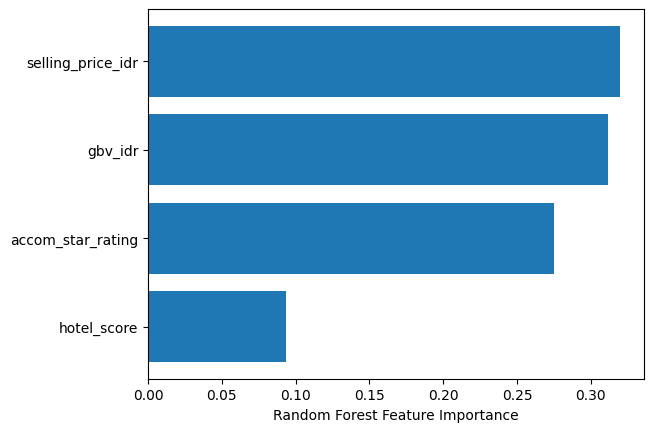

In [ ]:
sorted_idx = rfc_aft_grid_search.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], rfc_aft_grid_search.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

Text(0.5, 0, 'XGBoost Feature Importance')

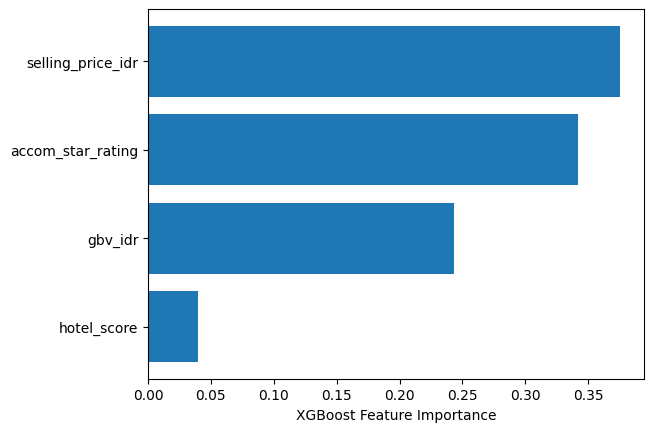

In [ ]:
sorted_idx = xgb_aft_grid_search.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], xgb_aft_grid_search.feature_importances_[sorted_idx])
plt.xlabel("XGBoost Feature Importance")